In [19]:
pwd

'/Users/sanjayfuloria'

In [20]:
import os
os.chdir('/Users/sanjayfuloria')

In [21]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [22]:
data=pd.read_csv("bank.csv",header=0)
data=data.dropna()
print (data.shape)
print(list(data.columns))

(45211, 18)
['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [23]:
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

Data Exploration

In [25]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

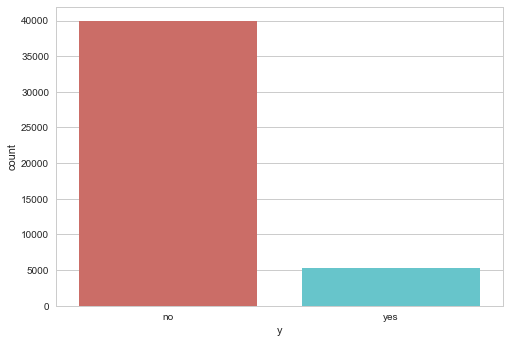

In [26]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
Converting 'yes' in the variable column 'y' to 1 and 'no' to 0

In [30]:
data.y[data.y == 'yes'] = 1
data.y[data.y == 'no'] = 0
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub) if (count_no_sub+count_sub) !=0 else 0
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub) if (count_no_sub+count_sub) !=0 else 0
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

In [35]:
data.groupby(['y']).mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
0,21198.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,33229.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [37]:
data.groupby(['job']).mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,,
admin.,23225.636627,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,19597.209721,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,21008.053800,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,21539.344355,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,24030.531613,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,27553.681095,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,23199.673844,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,20873.053924,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,33469.698294,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [38]:
data.groupby(['marital']).mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,,
divorced,21752.244094,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,21854.207944,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,24553.206880,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [39]:
data.groupby(['education']).mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,,
primary,20496.166107,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,22015.010473,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,24787.013533,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,22152.015078,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


Visualizations

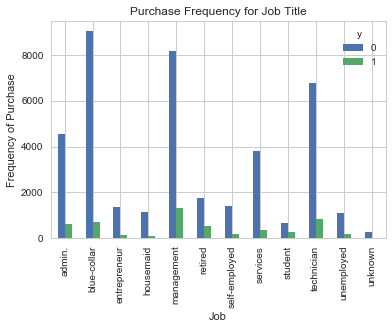

In [40]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.